<div style="text-align: right; font-size: 2em"> <b> FIT1043 Introduction to Data Science </b> </div>
<br>
<div style="text-align: right; font-size: 2em"> <b> Assignment 2 </b> </div>
<br>
<div style="text-align: right"> Lim Yu-Shan </div>
<div style="text-align: right"> 32685467 </div>
<div style="text-align: right"> 29<sup>th</sup> April 2022 </div>

## Introduction  

This is a predictive analysis of a dataset of essay scores using machine learning techniques. The file containing the data is `FIT1043-Essay-Features.csv`, which consists of more than 1300 entries. 

This data will be split into training and testing sets. The training set will be used to construct a predictive model using a support vector machine (SVM) algorithm. The model's performance is then evaluated via the calculation of its quadratic weighted kappa (QWK) score and the prediction of an independent dataset to be submitted for an in-class Kaggle competition.

### Imports and file reading

Before we begin our predictive analysis into the data contained in `FIT1043-Essay-Features.csv`, we first import the necessary libraries - **NumPy** and **pandas**.

In [1]:
import numpy as np
import pandas as pd

Then we use **pandas**'s `read_csv` method to convert the CSV file into a DataFrame labelled `essays`.

In [2]:
essays = pd.read_csv('FIT1043-Essay-Features.csv')
essays.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


The `info` and `describe` methods are used to gain more information about the dataset we are dealing with.

In [3]:
essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   essayid                    1332 non-null   int64  
 1   chars                      1332 non-null   int64  
 2   words                      1332 non-null   int64  
 3   commas                     1332 non-null   int64  
 4   apostrophes                1332 non-null   int64  
 5   punctuations               1332 non-null   int64  
 6   avg_word_length            1332 non-null   float64
 7   sentences                  1332 non-null   int64  
 8   questions                  1332 non-null   int64  
 9   avg_word_sentence          1332 non-null   float64
 10  POS                        1332 non-null   float64
 11  POS/total_words            1332 non-null   float64
 12  prompt_words               1332 non-null   int64  
 13  prompt_words/total_words   1332 non-null   float

In [4]:
essays.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


Based on the outputs of `head` and `info`, the data looks clean and processed. 

This dataset is derived from a set of essays via information extraction and contains numeric data about essay features, such as number of words, average word length and essay score. There are a total of 19 essay features and 1332 essay entries.

Based on the output of `describe`, the mean score of all essays is approximately 3.42. The 25th and 50th percentiles are 3 whereas the 75th is 4, which is a clear sign that essays with scores of 3 and 4 dominate the dataset.

From the features, it can be observed that the data has undergone some natural language processing (NLP) as well. Parts-of-speech (POS) as well as stemmed and unstemmed word counts have been identified from the corpus. In addition, the text in each essay has been classified into subsets (bag of words model), including words related to the essay topic, words that are synonymous, punctuation, questions and sentences. The data for sentences have been broken down into word and character count as well. These are basic techniques of NLP that helps computer programs and predictive models understand human language better.

We can now start our predictive analysis.

## Supervised learning

### Explanation

The predictive analysis of this dataset will involve the usage of **supervised machine learning** techniques. In supervised machine learning, algorithms are trained using data that are labelled. The goal is to approximate the best possible function that predicts accurate outputs for new input data. **Labelled data** refers to data with known input and output values. Using these pairs of inputs and corresponding correct outputs, a supervised machine learning algorithm continuously learns by comparing its actual outputs with the correct outputs. The algorithm modifies itself to reduce error until an optimal result is achieved.

In order to train the algorithm to create a good model, we need to split the labelled data into **training** and **test datasets**. The training dataset is used to train the parameters of the model (ie. to fit a model to the training data). In order to evaluate how well the model performs, the test dataset is run through the model and, because the data are labelled and we know the correct outputs, we compare the model's outputs with the correct outputs. This procedure gives us a performance metric of the model, which helps us decide whether to re-adjust the model parameters for a better result or deploy it.


### Features and label

The first thing to do is to identify the features (ie. the inputs) and the label (ie. the output) of the dataset. We want the function to be modelled after the relationship between the features and the label.

For this dataset, the label is `score`, whereas all other variable are features. Hence, we assign the features to `X` and the label - `score` to `y`.

In [5]:
X = essays_features = essays.drop(['score'], axis = 1)
y = essays['score']

### Training and testing data

Now, we have to split the data into training and testing data. As mentioned before, training data is used to train the model parameters to obtain a good fit, whereas testing data will be used to evaluate the model's performance.

To do this, we will utilise a library called **Scikit-learn**, which provides useful machine learning tools for Python, including a method to automate the random splitting of data into training and testing data for us. More specifically, the function we need is `train_test_split` from the `model_selection` module of **Scikit-learn**.

In [6]:
from sklearn.model_selection import train_test_split

We pass in the features `X` and the label `y` into the `train_test_split` function with an additional parameter `test_size = 0.2`, which means 20% of the data will be used as testing data whereas the remaining 80% will be the training data. The `random_state` is set to 12 for results to be reproducible.

The return value of the function will be a list containing the values of features used for training and testing, and the values of the label used for training and testing. This list is unpacked into four variables.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

## Classification

### Explanation

Classification can be categorised into two types: **binary classification** and **multi-class classification**.

**Binary classification** is simpler: data is grouped into two classes. The model aims to predict which class or group a given input belongs to. For example, a binary classification algorithm can be observed in email spam filters. A spam filter takes an incoming email as input and outputs whether it should go to the inbox (which is one class), or the spam folder (which is the other class). Binary classification algorithms include logistic regression and support vector machines (SVM).

In **multi-class classification**, data is grouped into more than two classes. There is no limit to the number of classes. The model is much more complex than that of binary classification, as it has many factors to take into account. An example of a multi-class classification algorithm can be observed in character recognition software. The software takes a picture of a character as input and identifies it. The character could be one of the 26 letters of the alphabet, a number, or punctuation. The random forest is one type of multi-class classification algorithm.   

### Data normalisation

Before we build the model, the data has to first be normalised/scaled. This is essential as we are dealing with many features. The range of values of these different features vary widely. If we fit a model on the raw values of these features, the model will be greatly influenced by the features with larger ranges of values. 

To better illustrate this, let us call `describe` on the features.

In [8]:
X.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000


As we can see, the `chars` feature ranges from a value of 169 to 6142, whereas `avg_word_length` ranges from 2.231322 to 5.681429. The distributions of the data of these two features alone differ greatly. `chars` will have a much larger contribution towards the model than `avg_word_length`.

In order to ensure that each feature has a proportional contribution to the model, we need to transform them to ensure that they have similar distributions (eg. a normal distribution). This process is called normalisation, and it is needed for our dataset due to the large number of features.

**Scikit-learn** contains normalisation tools to help us scale our data efficiently. The one that we will be using is `StandardScaler` from the `preprocessing` module.

In [9]:
from sklearn.preprocessing import StandardScaler

Now, we have to instantiate a `StandardScaler` object and use it to normalise the values of the features. The functions to be used are `fit_transform` (which stores the mean and standard deviation values in the `StandardScaler` object) for the training data and `transform` (which applies the stored mean and standard deviation) for the testing data. 

In [10]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

`fit_transform` and `transform` returns the scaled data in the form of **Numpy** arrays, so we convert them back to proper DataFrames using `pd.DataFrame` with the original index and column names.

In [11]:
X_train = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)

### Support vector machines (SVM) and regression

**Support vector machines** (SVM)* are methods of supervised machine learning that aim to recognise patterns in data for classification and regression. For basic intuition, observe this graph:

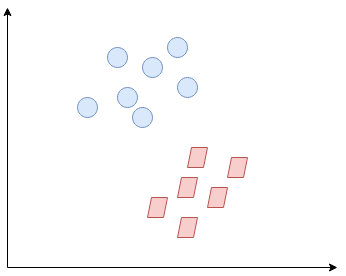
<center>Source: Analytics Vidhya</center>

Examples are mapped as points on the graph so that they are divided by a clear gap into unique categories. A new example would be mapped on the same graph and its category is predicted based on the side it falls on. There are many ways to draw a line that separates the data perfectly. What an SVM aims to do is determine which line separates the classes best (ie. maximises the gap between the classes). For this graph, the line look like this:

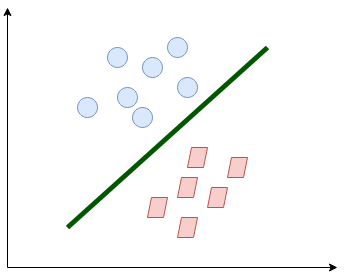
<center>Source: Analytics Vidhya</center>

This method of SVM can be extended to solve regression problems. We call this **support vector regression** (SVR). While linear regression simply finds a line that minimises error between actual and predicted points, SVR searches for a line (also known as the hyperplane) that best fits the points within a fixed margin of error. This margin of error is defined by decision boundary lines, as shown below:

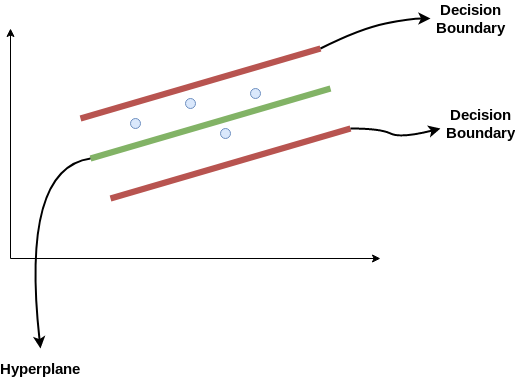
<center>Source: Analytics Vidhya</center>

Basically, an SVR model is dependent on only a subset of the training data. The points within the decision boundary lines are taken into account whereas those that lie beyond the margin (the support vectors) are ignored. This allows us to build a model with greater flexibility.

One important attribute of SVMs is the **kernel**. Sometimes, it may be difficult to search for a linear hyperplane on a 2-dimensional space. By converting the 2-dimensional space to a 3-dimensional one, it will be easier to find a hyperplane. Kernels are mathematical functions that move data in a given dimenstion to a higher dimension.

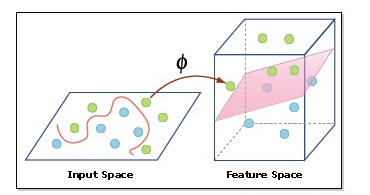
<center>Source: Analytics Vidhya</center>

In SVR, kernels can be applied for the regression of non-linear functions. The concept is similar; non-linear data is mapped onto a space such that the data is linear. A straight line can then be represented, not to separate data points into groups, but to compute the contribution of support vectors to the regression problem.

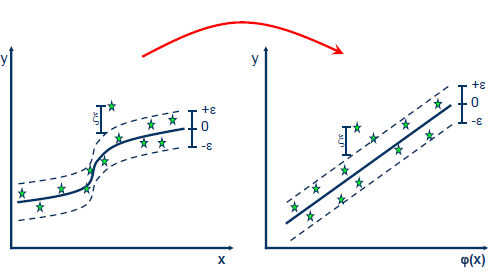
<center>Source: Saed Sayad</center>

Since the label of our dataset is a score value that is a discrete integer between 1 and 6 inclusive, it can treated as a classification problem. Hence, we build our model using support vector classification (SVC). First, we need to import the `SVC` class from **Scikit-learn**'s `svm` module.

\* Information on support vector machines sourced from [Scikit-learn](https://scikit-learn.org/stable/modules/svm.html) and [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/).

In [12]:
from sklearn.svm import SVC

Some features can be removed from the dataset using `drop` as if they do not have a significant impact on the score. This can prevent overfitting and aid in constructing more accurate models.

To know what features to drop, we can try to understand the correlation between each feature using `corr`.

In [13]:
corr = X.corr()
corr

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
essayid,1.000000,0.020961,0.021810,0.025137,-0.020580,-0.008286,-0.025634,0.016737,0.019837,-0.027987,0.021576,-0.024392,0.020400,-0.024958,0.016857,-0.023628,0.017443,0.018011
chars,0.020961,1.000000,0.991998,0.647711,0.437508,0.184317,0.236563,0.366223,0.328230,-0.040719,0.992162,0.317080,0.948406,-0.034214,0.912003,-0.286498,0.953534,0.955315
words,0.021810,0.991998,1.000000,0.647159,0.456932,0.189927,0.123142,0.422922,0.336836,-0.042562,0.999907,0.305294,0.960853,-0.026602,0.924474,-0.273979,0.948491,0.950299
commas,0.025137,0.647711,0.647159,1.000000,0.397497,0.206741,0.126595,0.207493,0.316261,-0.025439,0.648915,0.288851,0.656856,0.128626,0.535154,-0.316782,0.620890,0.625511
apostrophes,-0.020580,0.437508,0.456932,0.397497,1.000000,0.123361,-0.060541,0.153522,0.261627,-0.041249,0.458441,0.239325,0.399875,-0.126017,0.384010,-0.203050,0.418899,0.420205
punctuations,-0.008286,0.184317,0.189927,0.206741,0.123361,1.000000,-0.002907,0.073871,0.186927,0.001231,0.189862,0.054761,0.154392,-0.097769,0.115570,-0.188629,0.206697,0.210935
avg_word_length,-0.025634,0.236563,0.123142,0.126595,-0.060541,-0.002907,1.000000,-0.235555,-0.021521,-0.029476,0.125381,0.193213,0.100699,0.007607,0.067775,-0.199210,0.215553,0.213924
sentences,0.016737,0.366223,0.422922,0.207493,0.153522,0.073871,-0.235555,1.000000,0.085832,-0.216685,0.423114,0.133209,0.507311,0.220771,0.296638,-0.276531,0.304875,0.305678
questions,0.019837,0.328230,0.336836,0.316261,0.261627,0.186927,-0.021521,0.085832,1.000000,0.035576,0.336968,0.117700,0.314656,-0.023159,0.280209,-0.147619,0.341716,0.344837
avg_word_sentence,-0.027987,-0.040719,-0.042562,-0.025439,-0.041249,0.001231,-0.029476,-0.216685,0.035576,1.000000,-0.042358,-0.018647,-0.059790,-0.065765,-0.003026,0.148188,-0.029949,-0.029325


The following cell of code is adapted from an [article](https://vishalramesh.substack.com/p/feature-selection-correlation-and-p-value-da8921bfb3cf?r=9u6n7&s=w&utm_campaign=post&utm_medium=web) by Vishal R.

Basically, we are iterating through every feature and when we find a pair of features with a correlation of at least 0.9, we eliminate one of them.

In [14]:
### code by Vishal R
columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i, j] >= 0.9:
            if columns[j]:
                columns[j] = False

droppable = X.columns[~columns]
droppable

Index(['words', 'POS', 'prompt_words', 'synonym_words', 'unstemmed',
       'stemmed'],
      dtype='object')

It seems that `essayid` is not included in the features to drop. This may seem unrealistic, but it may be a coincidence that it does play a role in influencing the score.

The droppable features are coded neatly into a list for convenience, and dropped from the dataset. In case we want to test other combinations of dropped features, we only need to edit the list.

In [15]:
to_drop = ['words', 'POS', 'prompt_words', 'synonym_words', 'unstemmed', 'stemmed']
X_train.drop(to_drop, axis = 1, inplace = True)
X_test.drop(to_drop, axis = 1, inplace = True)

Calling `SVC()` instantiates an `SVC` estimator object with default parameters. Of these parameters, the most important ones are `kernel` (the default is `rbf`, which is the radial basis function kernel), `C`* (the default is `1.0`) and `gamma`** (the default is `scale`, which is 1 divided by the product of the number of features and the variance of `X`).

These are the parameters that we will pay attention to. By adjusting these parameters, we can obtain a better model. We can simply build our model multiple times and see which one performs best, but this is a hassle. One way to automate this process is via a **grid search**. We create a 'grid' of parameters with all the values we want to try out, and a grid search can help us find the best combination efficiently. To do this, we first have to import `GridSearchCV` from **Scikit-learn**'s `model_selection` module.

\* `C` is the regularisation parameter. Its value is inversely proportional to regularisation strength. The stronger the regularisation the lower the variance of the model and the higher the bias. (Source: [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))

** `gamma` is the kernel coefficient. The higher its value, the more sensitive the model is to feature differences. An overly high value of `gamma` would result in overfitting. (Source: [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))

In [16]:
from sklearn.model_selection import GridSearchCV

Now, we create the grid of parameters to test, which is in the form of a dictionary. For `C` and `gamma`, we will use a range of 6 common values for each parameter. We will only be including the `rbf` kernel as it is arguably the best kernel* for linearly unseparable data. This is true for our dataset; the values of essay features are not linearly separable.

\* There are many reasons as to why it is considered the 'best'. These reasons are subjective, but the most common ones include invariance to translation, infinite smoothness, and ease of calibration. (Source: [Stats Stack Exchange](https://stats.stackexchange.com/questions/172554/why-is-rbf-kernel-used-in-svm))

In [17]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'],
              'kernel': ['rbf']
             }

What `GridSearchCV` does essentially is that it takes an estimator (in our case, `SVR`) and instantiates an estimator that behaves exactly the same. The difference is that this estimator can implement special methods to evaluate and optimise its performance with each iteration of testing.

So now, we instantiate a `GridSearchCV` object with parameters `SVR()` (which is the estimator we want to use), `param_grid` (which is the variable containing our grid of parameter values) and `verbose = 3` (which prints some messages about the grid search process as it executes). The higher the value of `verbose`, the more messages we see. We want to see some verbose as it shows us exactly what is happening.

We assign this newly created `GridSearchCV` to the variable `grid`, and use that to train our model using `fit`, which has to take the training datasets `X_train` and `y_train` as parameters.

In [18]:
grid = GridSearchCV(SVC(), param_grid, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.437 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.437 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.437 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.432 total time=   0.0s


/home/sunny/miniconda3/envs/learning/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.432 total time=   0.0s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.437 total time=   0.0s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.437 total time=   0.0s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.437 total time=   0.0s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.432 total time=   0.0s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.432 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.437 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.437 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.437 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.432 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.432 total time=   0.0s
[CV 1/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.437 total time=   0.0s
[CV 2/5] END ...C=0.01, gamm

[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.634 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.638 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.634 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.596 total time=   0.0s
[CV 1/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.634 total time=   0.0s
[CV 2/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.606 total time=   0.0s
[CV 4/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.662 total time=   0.0s
[CV 5/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.606 total time=   0.1s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.624 total time=   0.1s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.620 total time=   0.1s
[CV 4/5] END ........C=100, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'],
                         'kernel': ['rbf']},
             verbose=3)

We can then call `grid.best_params_` to get the best combination of parameter values.


In [19]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Now that we know the parameter values we should use, we instantiate an `SVC` object (we call it `model`) with those parameters and use `fit` to construct the model using support vector classification.

In [20]:
model = SVC(C = 1000, gamma = 0.001, kernel = 'rbf')
model.fit(X_train, y_train)

SVC(C=1000, gamma=0.001)

### Predictions

Now that we have our model, we can obtain the predicted y-values of our testing data by passing the corresponding x-values into the `predict` function. We will assign these predicted values to the variable `y_pred`.

In [21]:
y_pred = model.predict(X_test)

A confusion matrix is a good way to evaluate our model's performance. However, since we used support vector regression to construct it, the predicted y-values are continuous float values that cannot be represented in a confusion matrix. Thus, we have to convert these values into discrete classes. A suitable way to do this is to round each number in `y_pred` so that it becomes a discrete score value between 1 and 6 inclusive. We will call this array of rounded `y_pred` values as `y_pred_classed`. `y_pred_classed` is first initialised as a **Numpy** array of zeroes. Each zero is then replaced by iterating through an enumeration of `y_pred`.

In [22]:
from sklearn.metrics import confusion_matrix

Our testing data and predicted data, which are `y_test` and `y_pred` respectively, are passed into `confusion_matrix`. This returns a 6x6 confusion matrix (since there are 6 'classes', ie. score values) in the form of a **Numpy** array, which we assign to the variable `cm`.

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1,  5,  0,  0,  0,  0],
       [ 1, 11,  6,  0,  0,  0],
       [ 0,  8, 79, 23,  0,  0],
       [ 0,  0, 27, 91,  2,  0],
       [ 0,  0,  0,  9,  2,  1],
       [ 0,  0,  0,  0,  1,  0]])

The horizontal axis of the matrix tells us the predicted score (1 to 6 from left to right) and the vertical axis tells us the actual score (1 to 6 from top to bottom). For example, the cell in the second row and third column is 6, meaning there are 6 instances where the actual score was 2 but our model predicted 3. Hence, the diagonal of the matrix represents the number of correct predictions. It can be seen that extreme scores that appear less in the dataset (such as 1 and 6) are more likely to be predicted wrongly. Large numbers along(meaning accurate predictions) and around the diagonal (meaning predictions are close to the actual values) is a good sign that the model performs well.

To visualise our confusion matrix, we can use a **Seaborn** heatmap. Both **Matplotlib** and **Seaborn** are imported. Both are popular data visualisation libraries. **Seaborn** is built on top of **Matplotlib**, so by importing **Matplotlib**, we can fine-tune the appearance of the heatmap.

<AxesSubplot:title={'center':'Confusion matrix of an SVC model that predicts the score of an essay'}, xlabel='Predicted score', ylabel='Actual score'>

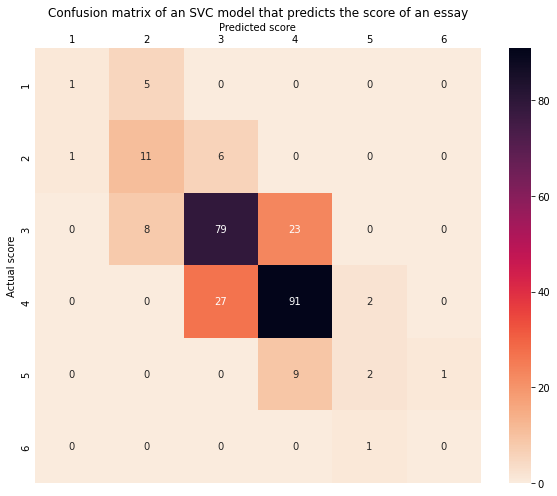

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.subplots() returns a figure and its axes in the form of a tuple, which we unpack into 'fig' and 'ax'
fig, ax = plt.subplots(figsize = (10, 8))  

# the figure is set as a Seaborn heatmap with data from the array 'cm'
# cmap is the colour palette, which is set to 'rocket_r' (the rocket palette with colours inverted so darker colours mean higher values)
# annot is set to True so the values of each cell is displayed, fmt = 'g' disables scientific notation
# xticklabels and yticklabels are both 1 to 6, since those are our classes
fig = sns.heatmap(cm, cmap = 'rocket_r', annot = True, fmt = 'd', xticklabels = np.arange(1, 7), yticklabels = np.arange(1, 7))

# this line of code makes the ticks on each axis invisible, and sets the x-axis to appear at the top of the heatmap
plt.tick_params(axis = 'both', which = 'major', length = 0, labeltop = True, labelbottom = False)

# the x-axis label is renamed and positioned to the top of the heatmap
ax.set_xlabel('Predicted score')
ax.xaxis.set_label_position('top')

# the y-axis label is renamed
ax.set_ylabel('Actual score')

# the title of the heatmap is set
fig.set_title('Confusion matrix of an SVC model that predicts the score of an essay')

fig

From the visualised confusion matrix, we can observe that all counts of inaccurate predictions are adjacent to the diagonal. Most of the essay scores in the testing dataset are either 3 or 4. Our model got many of them right; the most predicted score is 4 with 123 predictions, of which 91 were correct. 3 was predicted 112 times, and the prediction was correct on 79 instances. Due to the small number of essays with scores 1 and 6 in the training data, it is much harder for our model to predict those scores accurately.

To evaluate the model's performance with a single numerical value, we can compute its **quadratic weighted kappa (QWK)**\* score. In simplest terms, the QWK is classification accuracy normalised at the baseline of random chance on the dataset. It measures the level of agreement between the actual values and the predicted values. To go a little bit more into detail, QWK takes three matrices into account: the confusion matrix (conventionally called 'O'), the weight matrix 'w' (designed to punish values far from the diagonal in the confusion matrix) and the expected matrix 'E' which is the outer product of the actual and predicted values' counts. The QWK is then calculated as follows:

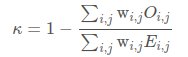

<center>Source: Hongnan G</center>
<br/><br/>

\* Information on quadratic weighted kappa sourced from [Hongnan G](https://www.kaggle.com/code/reighns/understanding-the-quadratic-weighted-kappa/notebook).

The easiest way to compute the QWK is to import `cohen_kappa_score` from **Scikit-learn**'s `metrics` module, and call it on the actual and predicted values. The `weights` parameter has to be set to `quadratic` as well.

In [25]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred, weights = 'quadratic')

0.7308238895164523

Hence, the QWK score of the model for this testing dataset is approximately 0.73082. In other words, the level of agreement between the actual values and our predicted values can be approximated to 0.73082 based on the QWK metric. 

## Kaggle submission

The `FIT1043-Essay-Features-Submission.csv` file contains the feature values of essays without their actual scores. Using our model, we predict the values, output them to a CSV file, and submit it to an in-class [Kaggle competition](https://www.kaggle.com/t/7d9f63612b794f9bbd94cf1aca80856c). This gives us a rough idea of how our model performs when deployed on a given dataset.

`FIT1043-Essay-Features-Submission.csv` is first read into a DataFrame called `kaggle`. Using the `StandardScaler` object from before, we scale the data and drop the appropriate features.

In [26]:
kaggle = pd.read_csv('FIT1043-Essay-Features-Submission.csv')
kaggle_scaled = sc.transform(kaggle)
kaggle = pd.DataFrame(kaggle_scaled, index = kaggle.index, columns = kaggle.columns)
kaggle_drop = kaggle.drop(to_drop, axis = 1)

The model is then used to predict the score values of the essays. This returns a **Numpy** array which we call `k_pred`. The array is converted to a **pandas** Series and appended directly into the provided template CSV file `YourID-YourName-1.csv`.

In [27]:
k_pred = model.predict(kaggle_drop)
k_pred = pd.Series(k_pred)
submission = pd.read_csv('YourID-YourName-1.csv')
submission['score'] = k_pred

submission

,essayid,score
0,1623,4
1,1143,3
2,660,4
3,1596,4
4,846,4
...,...,...
194,1226,3
195,862,4
196,1562,4
197,1336,3


Finally, the DataFrame `submission` is outputted to a CSV file.

In [28]:
submission.to_csv('32685467-LimYu-Shan-1.csv', index = False)

## Conclusion

This assignment gave us much insight about how the features of an essay can affect its score in general. By studying the correlation between features, we can potentially predict the scores of essays without actually reading them, with good accuracy. Ultimately, essays are subjective and human graders are unlikely to be replaced by machine learning models that grade based on feature values, but the result of building such models can give us interesting information on which features impact human graders' perception of an essay the most, and the advancement of natural language processing may actually make artificially intelligent graders a reality in the future.

This assignment also served as a good introduction to predictive analytics and machine learning. I gained much knowledge about using training data to construct predictive models, and also the many powerful machine learning tools that **Scikit-learn** has to offer. This was also my first foray into submitting predictions for Kaggle competitions. Kaggle is indeed an extremely large and helpful community for data science and machine learning, and this assignment has inspired me to participate in more of these competitions in the future. 